Data shape: (150, 4)
Target shape: (150,)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


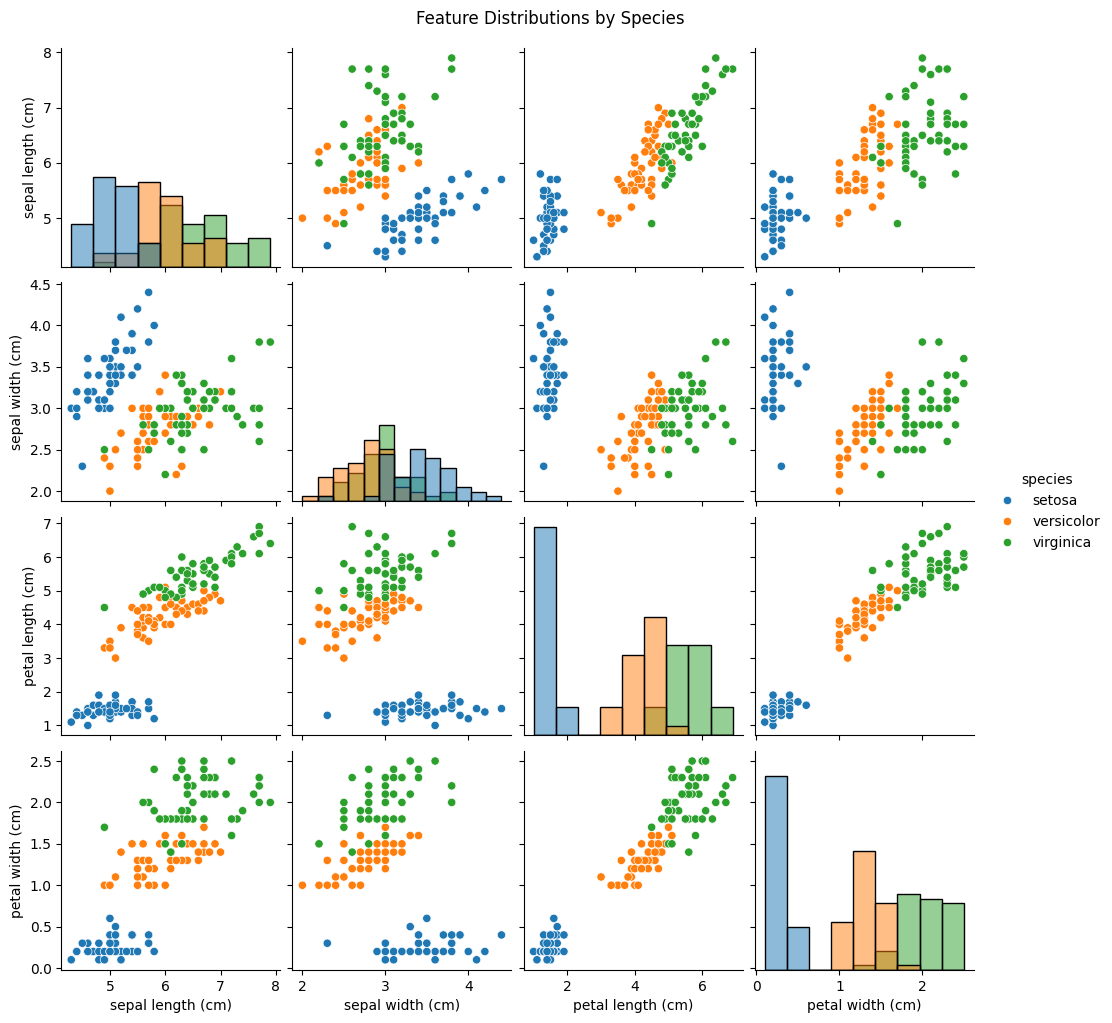


=== Model Performance ===
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



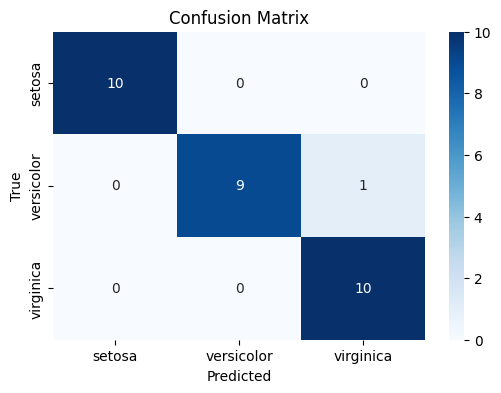

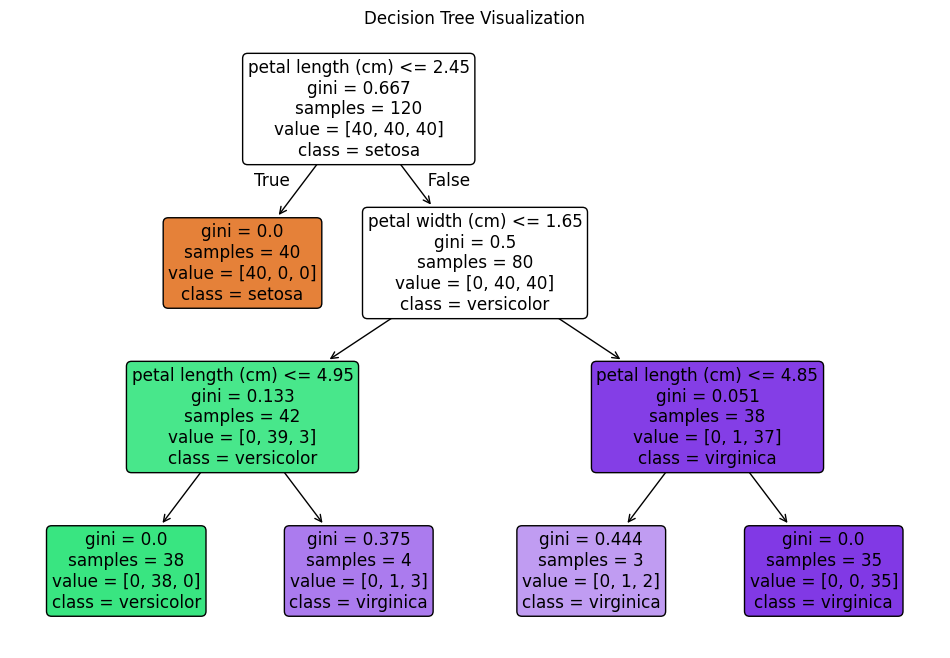


=== Feature Importance ===
             Feature  Importance
2  petal length (cm)    0.579077
3   petal width (cm)    0.420923
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


C:\Users\User\AppData\Local\Temp\ipykernel_12408\484120792.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


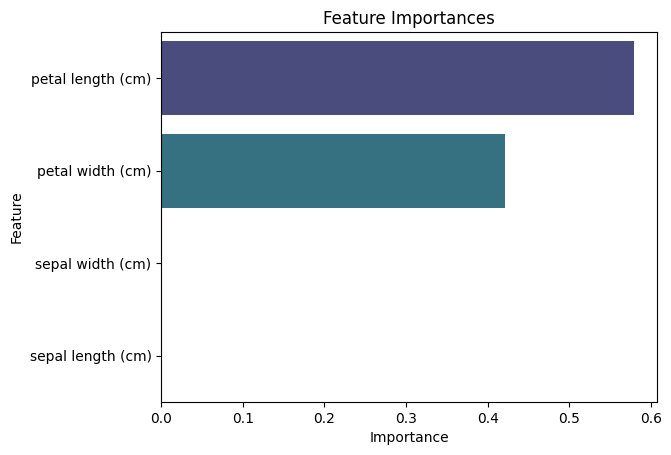


=== Best Parameters from GridSearch ===
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Model Accuracy: 0.9333333333333333
Classification Report (Tuned Model):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Data shape:", X.shape)
print("Target shape:", y.shape)

# Convert to DataFrame for easy exploration
df = pd.DataFrame(X, columns=feature_names)
df["species"] = [target_names[i] for i in y]
print(df.head())

# Visualize distributions
sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Feature Distributions by Species", y=1.02)
plt.show()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


clf = DecisionTreeClassifier(
    criterion="gini", 
    max_depth=3, 
    random_state=42
)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print("\n=== Model Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

importances = clf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\n=== Feature Importance ===")
print(importance_df)

sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importances")
plt.show()


param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, None],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("\n=== Best Parameters from GridSearch ===")
print(grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report (Tuned Model):\n", classification_report(y_test, y_pred_best, target_names=target_names))
